## Concha

Concha calculcates the optimal number of things to make/order of perishables.
It uses machine learning, the day of the week, the weather, and the profit margin
of each product to optimally balance filling customer demand and reducing waste.

In [5]:
# Run this cell first to bring in the concha code
!pip -q install concha
from concha import Planner

In [3]:
# This is a simulation for muffins.
# Let's say they're made in batches of 4, the marginal cost is
# $1.50 per muffin ($6 per batch), and they sell for $3.00 each.
sim_planner = Planner(
    planner_name="cafe_2",
    batch_size = 4,
    batch_cost= 6.0,
    unit_sale_price= 3.0
)

# We'll simulate 180 days of sales for 5 kinds of muffins
sim_planner.simulate_history(
    num_days=180,
    stockout_prob=0.5,
    demand_mean=100,
    demand_std=10,
    num_products = 5,
    write_csv=True
) 

In [4]:
# We'll compare profits from two different ways to plan production.
# The first is to use the average for weekdays and weekends from past
# days to plan future production. The other uses machine learning to
# maximize profit (revenue - waste). 
sim_planner.grid_search(
    param_grid={"model": [
        "MeanWeekPart",
        "ProfitMaximizer"
    ]},
    true_demand='demand'
)
# The difference in the profit_avg amount is the difference in daily profit between each
# way of planning production. 

Evaluating: {'model': 'MeanWeekPart'}
Evaluating: {'model': 'ProfitMaximizer'}


,model,label,profit_avg,waste_pct,profit,val_loss,waste
0,MeanWeekPart,model=MeanWeekPart,94.563333,8.626473,"[[55.67, 46.58, 57.0, 59.5, 65.42, 105.08, 90....",[[]],"[[10.78, 13.81, 9.78, 10.44, 6.47, 3.19, 9.53,..."
1,ProfitMaximizer,model=ProfitMaximizer,112.026667,8.684107,"[[69.25, 62.5, 77.83, 64.25, 83.75, 126.25, 11...","[[1.4166, 1.2792, 1.2088, 1.1658, 1.1328, 1.10...","[[6.36, 9.28, 3.39, 8.97, 5.64, 5.42, 7.81, 7...."


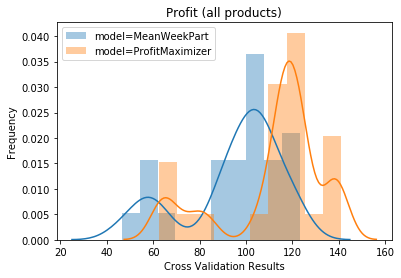

In [5]:
# Let's plot plot the average profits for each test run and each product.
sim_planner.plot_profits()